# Разработка стратегии взаимодействия с пользователями на основе аналитических данных.

## Описание проекта

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с пользователями на основе аналитических данных.

Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество анкет пользователей. **Основная задача исследования — провести анализ и подготовить план действий по удержанию клиентов.**

## План исследования <a id='section_0'></a>

[Исследовательский анализ данных (EDA)](#section_1)
- [Первый взгляд на данные](#section_2)
- [Выводы (EDA)](#section_3)
- [Сравнение средних показателей признаков оставшихся / ушедших (0 / 1)](#section_4)
- [Распределение признаков оставшихся / ушедших (0 / 1)](#section_5)
- [Матрица корреляций](#section_6)
[Построение моделей прогнозирования оттока клиентов](#section_7)
- [Вывод](#section_8)

[Кластеризация пользователей](#section_9)
- [Визуализация матрицы признаков и выделения кластеров: дендрограмма](#section_10)
- [Применение модели K-Means](#section_11)
- [Средние значения для кластвров](#section_12)
- [Распределение признаков для кластеров](#section_13)
- [Выводы](#section_14)

[Выводы и базовые рекомендации по работе с клиентами](#section_15)

In [1]:
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df = pd.read_csv('/datasets/gym_churn.csv')

## Исследовательский анализ данных (EDA) <a id='section_1'></a>

### Первый взгляд на данные <a id='section_2'></a>
[к плану исследования](#section_0)

In [3]:
display(df.info())
display(df.describe().T)
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


None

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
Near_Location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
Partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
Promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
Phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
Contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
Group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
Age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
Avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
Month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


### Выводы (EDA): <a id='section_3'></a>
[к плану исследования](#section_0)

**Качество данных:**
- Мы имеем дело с данными о 4000 клиентах фитнес-центов.
- Пропуски в данных отсутствуют.<br>

**Обзор числовых данных:**
- Гендерное распределение - примерно равное 51% на 49%. Средний возраст - около 30 лет.
- Средняя частота посещения в текущем и прошлом месяцах - 1.8 и 1.9 раз в неделю соответственно.
- Более половина пользователей предпочитают покупать абонемент на 1 месяц. При этом средний срок абонемента  - 4.7 мес. Средний срок до окончания абонемента 4.3 мес.
- Средний срок жизненного цикла клиентов на текущий момент 3.7 мес.
- Почти 85% клиентов - работающие или живующие рядом с фитнес-центром.
- Каждый второй клиент привлечен по партнерской программе.
- Каждый третий привлечен по программе "Приведи друга".
- 40% клиентов посещают групповые занятия.
- 90% клиентов оставили свой контактный номер телефона.
- Суммарная выручка от сопутствующих услуг - в среднем 140 у.е. / мес.



**Анализ стандартных отклонений:**
<br>Т.к. для бинарных признаков стандартное отклоенение слабо применимо в данном случае, проанализируем этот показатель на непрерывных и дискретных (не бинарных) признаков:
- Разброс срока абонемента достаточно существенный, что говорит о разных предпочтениях клиентов в вопросах выбора срока абонементов. Это находит свое отражение и на аналогичном показателе срока до окончания абонемента.
- Стандартное отклонение показателя жизненного цикла клиента также разнится. Это выглядит логичным с учетом различий в сроках абонементов от 1 до 12 мес.
- Стандартное отклонение частоты посещения равно +-1 посещение в неделю, что также выглядит довольно правдоподобным с учетом среднеий частоты посещения 2 раз в неделю.
- При этом по возрасту клиенты фитнес-центров располагаются довольно кучно и характеризуются не большим разбросом относительно средней/медианной величины. С учетом стандартного отклонения средний возраст клиентов составляет 26-32 лет.
- Существенный разброс наблюдается в тратах на сопутствующие услуги/товары в фитнес центрах.

**Отток клиентов (целевой показатель для дальнейшего исследования) в текущем месяце - 26%. Выглядит довольно существенно. Попробуем выяснить, что влияет на этот показатель и как можно его минимизировать в дальнейшем.**

### Сравнение средних показателей признаков оставшихся / ушедших (0 / 1) <a id='section_4'></a>
[к плану исследования](#section_0)

Churn,0,1,diff
Lifetime,4.711807,0.990575,-0.789767
Contract_period,5.747193,1.728558,-0.699234
Month_to_end_contract,5.283089,1.662582,-0.685301
Avg_class_frequency_current_month,2.027882,1.044546,-0.484908
Promo_friends,0.353522,0.183789,-0.480120
Group_visits,0.464103,0.268615,-0.421218
Partner,0.534195,0.355325,-0.334840
Avg_additional_charges_total,158.445715,115.082899,-0.273676
Avg_class_frequency_total,2.024876,1.474995,-0.271563
Near_Location,0.873086,0.768143,-0.120198


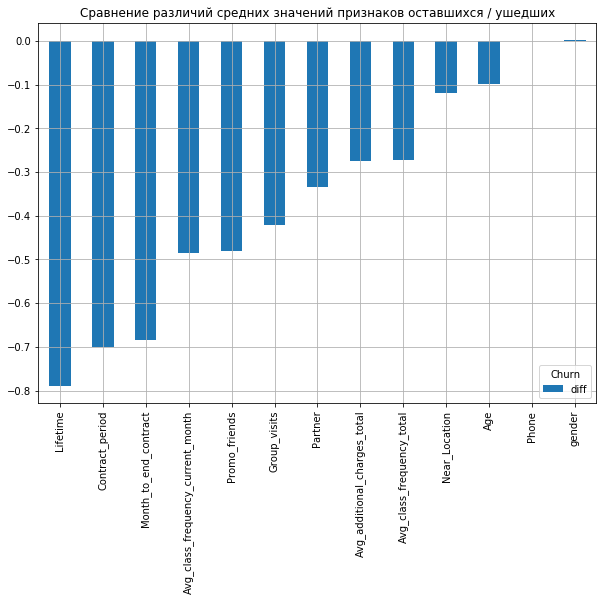

In [4]:
df_churn = (
    df.groupby('Churn').mean().T
    .assign(diff = lambda x: x[1] / x[0] - 1)
    .sort_values(by='diff')
)

display(df_churn)

df_churn[['diff']].plot(kind='bar', 
                        title='Сравнение различий средних значений признаков оставшихся / ушедших', 
                        grid= True, 
                        figsize=(10,7))
plt.show()

Наиболее существенный разрыв между оставшимися и ушедшими наблюдается в средних показателях признаков: Жизненного цикла, Сроком абонемента, Сроком до окончания действия абонемента. Предположительно эти признаки являются мультиколленеарными переменными. В дальнейшем выясним степень зависимоти между ними.

Помимо прочего различается частота посещения фитнес-центра в текущем месяце для уходящих пользователей. Тактже статистика показывает более частый уход клиентов, занимающихся индивидуально и привелеченных не по программе "Приведи друга". Наводит на мысль, что клиенты, проводящие занятие не в компании, более склонны к прекращению занятий. Однако это лишь гипотеза, требующая дополнительно исследования.

### Распределение признаков оставшихся / ушедших (0 / 1) <a id='section_5'></a>
[к плану исследования](#section_0)

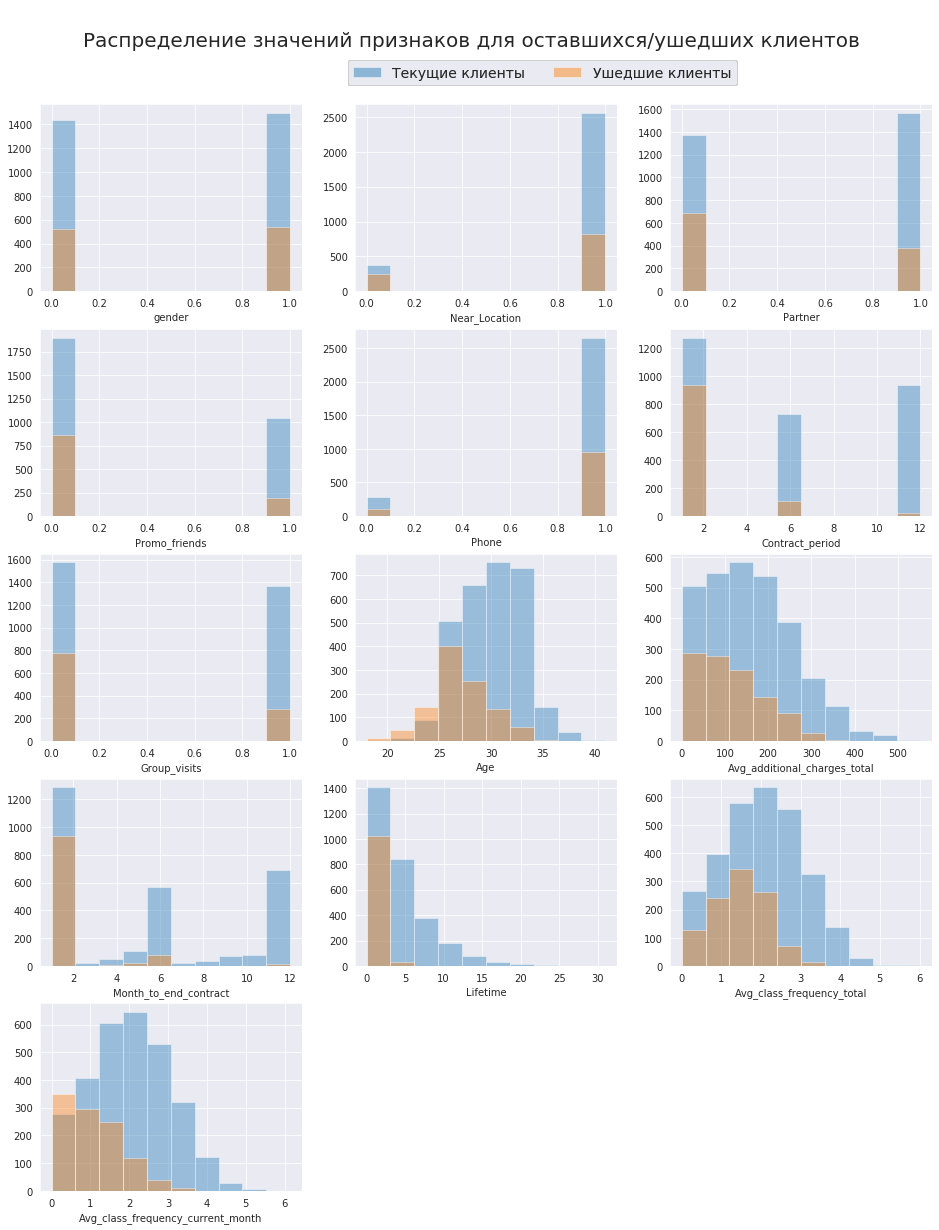

In [5]:
for i , col in enumerate(df.columns.drop('Churn')):
    sns.set_style('darkgrid')
    range_hist = (df[col].min(), df[col].max())
    plt.subplot(5, 3, i+1)
    fig = plt.gcf()
    fig.set_size_inches(16, 20)
    fig.legend(labels=['Текущие клиенты','Ушедшие клиенты'], loc=(.37, 0.93), ncol=2, fontsize=14)
    sns.distplot(df[df['Churn'] == 0][col], 
             kde=False,
             bins=10,
             hist_kws={'range': range_hist})
    sns.distplot(df[df['Churn'] == 1][col], 
             kde=False, 
             bins=10,
             hist_kws={'range': range_hist})
plt.suptitle('Распределение значений признаков для оставшихся/ушедших клиентов', y = 0.93, fontsize=20)
plt.show()

 Характер распределения по признакам в целом схож для тех кто остался клиентом и тех, кто попал в отток. Из существенных различий бросается в глаза возраст уходящих клиентов, он ниже в среднем на 3 года. Также логичным являются более редкие посещения у уходящих клиентов в месяц ухода, что также заметно на распределении `Avg_class_frequency_current_month` - снижание значения этого признака можно оценивать как сигнал к вероятному уходу в ближайший месяц. Также логичным является тот факт, что значительно чаще уходят клиенты, привлеченные не по партнерской корпоративной программе и с абонементом на 1 месяц.

### Матрица корреляций <a id='section_6'></a>
[к плану исследования](#section_0)

Построим heatmap на базе матрицы корреляции

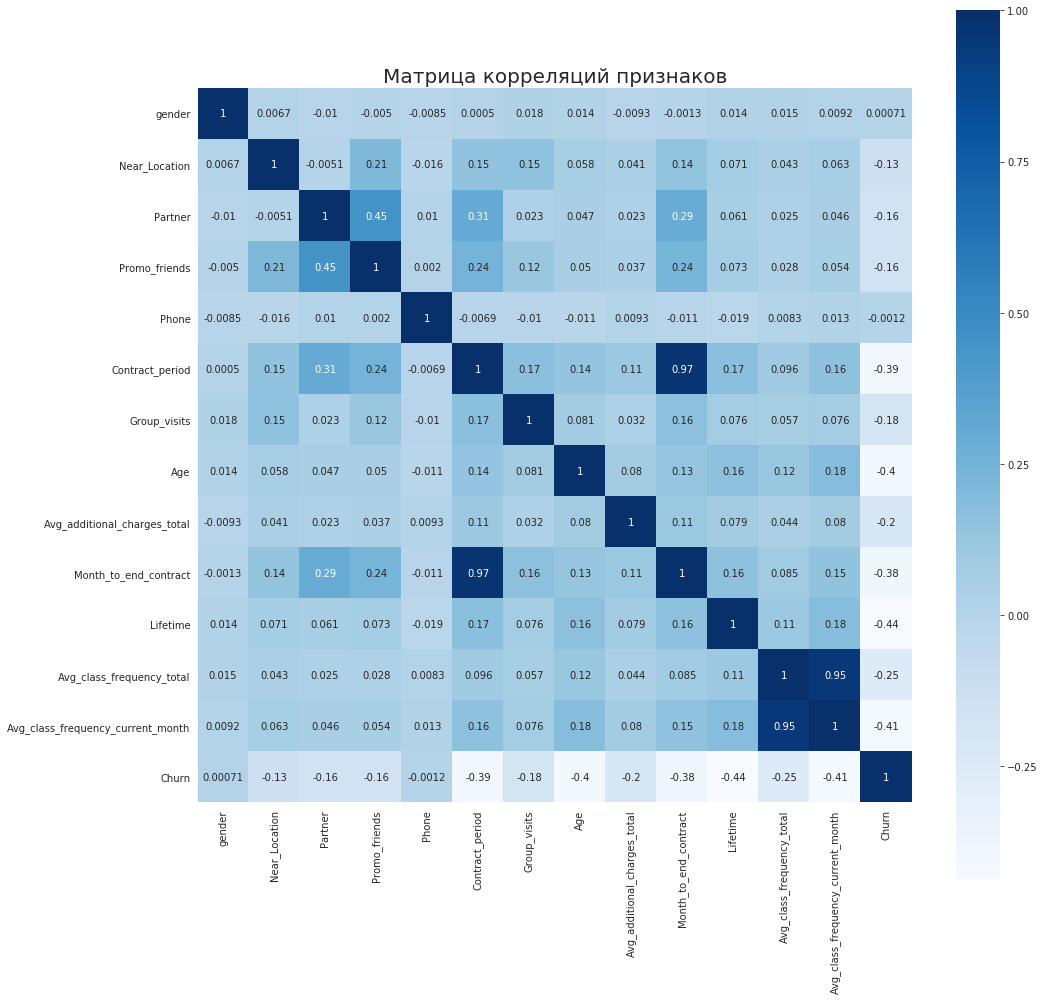

In [6]:
cm = df.corr()
fig, ax = plt.subplots(figsize=(16,16))
sns.heatmap(cm, annot=True, square=True, cmap="Blues")
plt.title('Матрица корреляций признаков', fontsize=20)
plt.show()

Значимых корреляций с целевой переменной не обнаружено. Но в матрице присутствуют признаки, демонстрирующие среднюю корреляцию с показателем оттока - на уровне 0.4. Как и предполагалось ранее мультиколлениарность наблюдается между сроком абонемента `Contact_period` и количеством месяцев до окончания абонемента `Month_to_end_contact`.

## Построение моделей прогнозирования оттока клиентов LogisticRegression и RandomForestClassifier <a id='section_7'></a>
[к плану исследования](#section_0)

Для начала обучим модель на train-выборке с помощью логистической регрессии

In [7]:
X = df.drop('Churn', axis = 1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y)

lr_model = LogisticRegression()

lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)
#y_probas = lr_model.predict_proba(X_test)[:,1]

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred)))


Accuracy: 0.94
Precision: 0.95
Recall: 0.80


Модель логистический регрессии прогнозирует более 90% правильных ответов. Однако метрики `Precision` и особенно `Recall` ниже - на уровне 0.91 и 0.82 соответственно. `Recall` говорит о том, что реально ушедих клиентов мы смогли спрогнозировать меньше и нам есть над чем поработать в плане корректировки модели. Попробуем реализовать модель методом `RandomForest`

In [8]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred)))

Accuracy: 0.93
Precision: 0.92
Recall: 0.80


Применение модели случайного леса показало практически идентичные метрики.

### Вывод: <a id='section_8'></a>
[к плану исследования](#section_0)

Различия между метриками случайного леса и логистической регресии минимальны. Обе метрики демонстрируют высокую долю правльных отметов. Однако, с учетом дисбаланса классов оставшихся / ушедших клиентов, более показательны метрики точность  и полноты (`precision`, `recall`), которые рассчитываются без привязки к соотношению классов. 

В данном случае точнось отнесения клиентов к классу ушедших среди этого класса `precision`  также довольно высокая - 0.88-0.91. Но при рассмотрении противоположных рисков `recall` мы видим, что реальных ушедших клиентов на самом деле оказалось меньше в валидационной выборке.

Разрыв между `precision` и `recall` не столь критичный и в этом есть свои плюсы и минусы - с одной стороны мы можем быть более осторожными и перестраховаться и предотвратить уход клиента из-за пониженной метрики `recall`. С другой стороны - мы можем затратить дополнительные ресурсы на удержание итак лояльного клиента.

##  Кластеризация пользователей <a id='section_9'></a>
[к плану исследования](#section_0)

Стандартизируем данные перед работой с алгоритмами

In [9]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

В переменно `linked` сохраним таблицу связок (матрицу признаков) с помощью функции `linkage()` и на базе нее отобразим дендограмму для для дальнейшего определения количества кластеров.

### Визуализация матрицы признаков и выделения кластеров: дендрограмма <a id='section_10'></a>
[к плану исследования](#section_0)

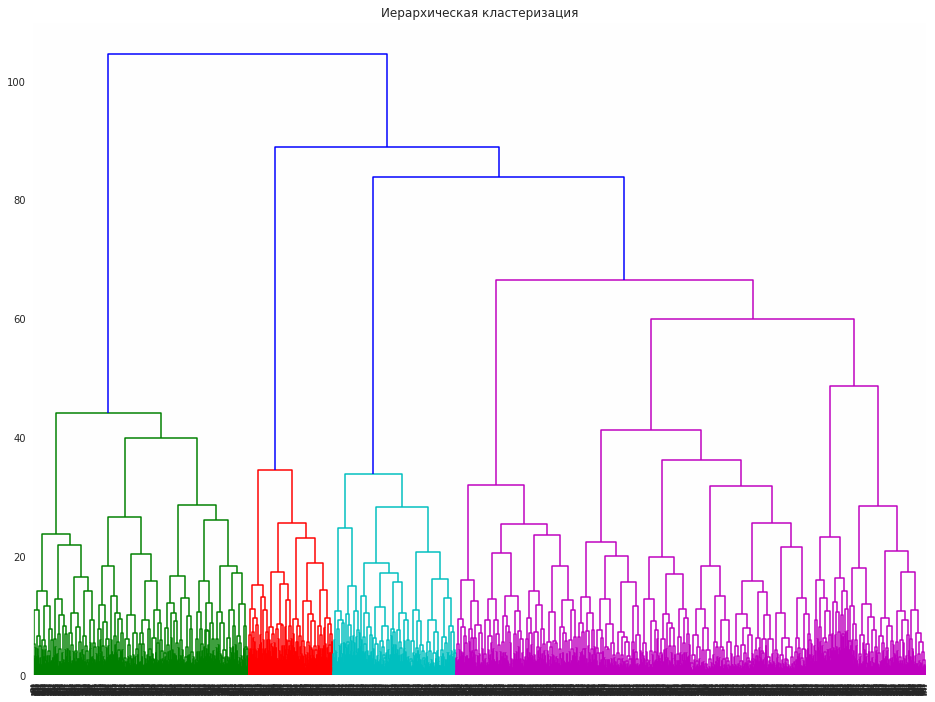

In [10]:
linked = linkage(X_sc, method = 'ward')

plt.figure(figsize=(16,12))
dendrogram(linked, orientation='top')
plt.title('Иерархическая кластеризация')
plt.show()

Предложенное оптимальное число кластеров 4

### Применение модели K-Means <a id='section_11'></a>
[к плану исследования](#section_0)

Зададим модель K-Means c заранее оговоренным числом кластеров `n=5` с присвоением им номеров от 0 до 4. Метки пластера сохраним в поле датасета `'cluster_km'`.

In [11]:
km = KMeans(n_clusters = 5, random_state = 0)
labels = km.fit_predict(df)

df['cluster_km'] = labels

### Средние значения для кластвров <a id='section_12'></a>
[к плану исследования](#section_0)

Выведем средние значения признаков в зависимости от кластера.

In [12]:
df.groupby('cluster_km').mean().T

cluster_km,0,1,2,3,4
gender,0.514091,0.511435,0.468635,0.508721,0.521246
Near_Location,0.839650,0.844075,0.856089,0.824612,0.881020
Partner,0.451895,0.495842,0.516605,0.488372,0.511331
Promo_friends,0.279883,0.320166,0.332103,0.293605,0.347025
Phone,0.897959,0.902287,0.926199,0.907946,0.898017
Contract_period,4.301263,4.755717,5.822878,4.198643,5.400850
Group_visits,0.407191,0.423077,0.431734,0.387597,0.433428
Age,28.973761,29.401247,29.845018,28.908915,29.344193
Avg_additional_charges_total,105.932804,174.873445,356.481960,35.600722,250.984767
Month_to_end_contract,3.996113,4.376299,5.383764,3.855620,5.001416


Наиболее существенные различия между кластерами можно заметить по признаку суммарной выручки от сопутствующих услуг `Avg_additional_charges_total` - градация среднего показателя от 36 у.е. (3-й кластер) до 356 (2-й кластер). 

Также, выделяются кластеры 2 и 4 по признаку срока абонемента `Contract_period`, что в свою очердь отражается на признаках `Lifetime` и `Month_to_end_contract` этих кластеров.

Помимо прочего показатель частоты посещения 2-го кластера является максимальным среди других, а показатель оттока минимальным - всего 4%, в то время как у других кластеров показатель оттока состаляет от 18% до 35%.

### Распределение признаков для кластеров <a id='section_13'></a>
[к плану исследования](#section_0)

In [13]:
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn,cluster_km
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0,3
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0,3
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0,1


df.columns

Для начала создадим отдельных два списка:
- с дисредными/бинальными признаками `disc_features`
- c непрерывными величинами `cont_features`

In [14]:
disc_features = ['gender', 'Near_Location', 'Partner', 
                 'Promo_friends', 'Phone', 'Contract_period', 
                 'Group_visits',  ]

cont_features = ['Age', 'Avg_additional_charges_total', 
               'Avg_class_frequency_total', 
               'Avg_class_frequency_current_month', 'Month_to_end_contract', 'Lifetime']

Для непрерывных признаков отобразим распределение внутри каждого кластера с помощью боксплотов.

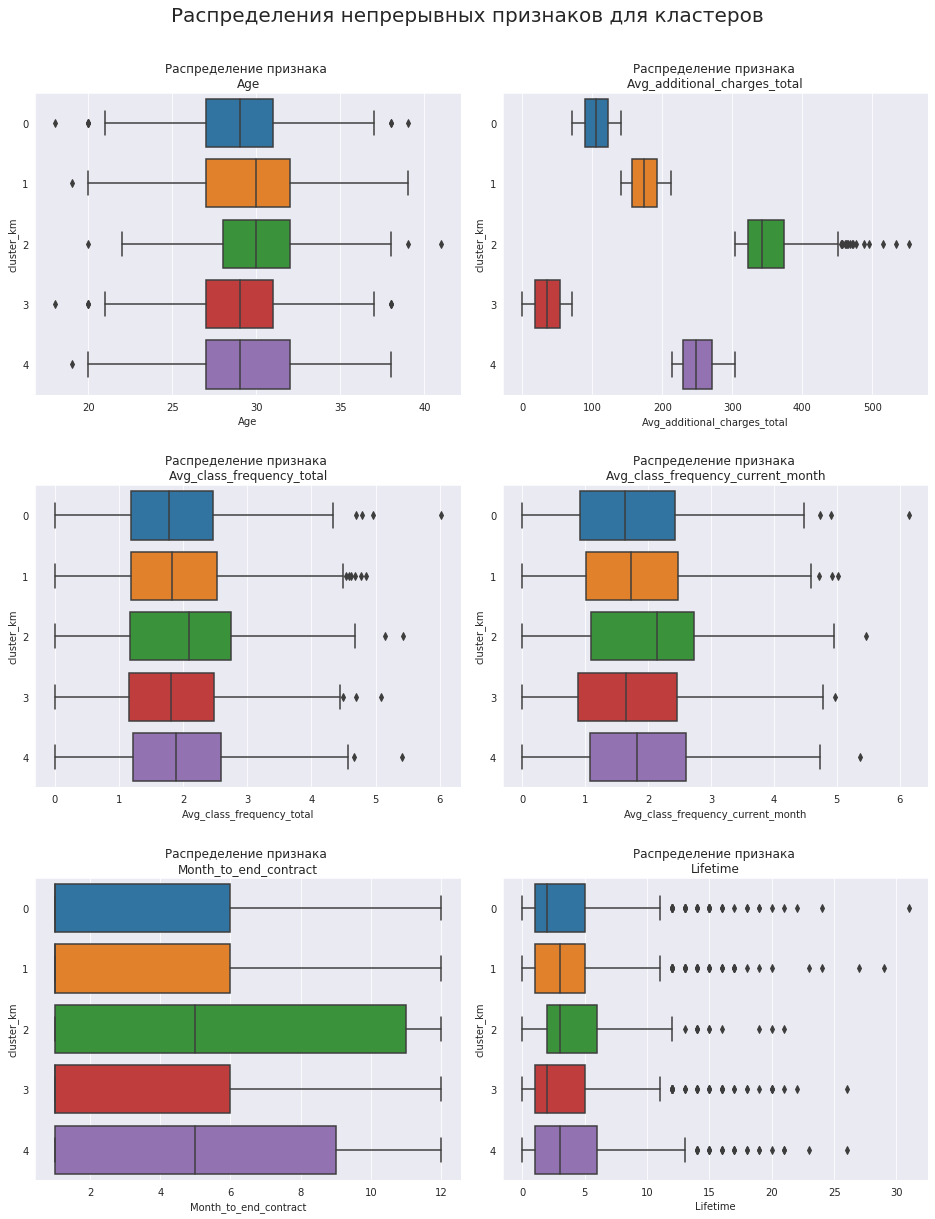

In [15]:
plt.subplots_adjust(wspace=0.1, hspace=0.3)

for i, col in enumerate(cont_features):
    plt.subplot(3, 2, i+1)
    fig = plt.gcf()
    fig.set_size_inches(16, 20)
    sns.boxplot(data = df, x = col, y = 'cluster_km', orient = 'h')
    plt.title('Распределение признака \n'+ str(col))

plt.suptitle('Распределения непрерывных признаков для кластеров', y = .94, fontsize=20)
plt.show()

Единственный признак среди признаков в непрерывными величинами, по которому можно заметить четкие границы классов - это суммарные траты на сопутствующие услуги / товары в фитнес-центре. Исходя из этого можем сделать предположение, что именно этот признак лежал в основе кластеризации.

По возрасту клиенты распределены  между кластерами практически идентично. Можно отметить незначительное превосходство по возрасту в 1-м и 2-м кластерах.

Также, клиенты 2-го кластера демонтрирует наиболее высокую частотность посещения. 

Для оценки распределения дискретных, бинальных признаков построим барплоты.

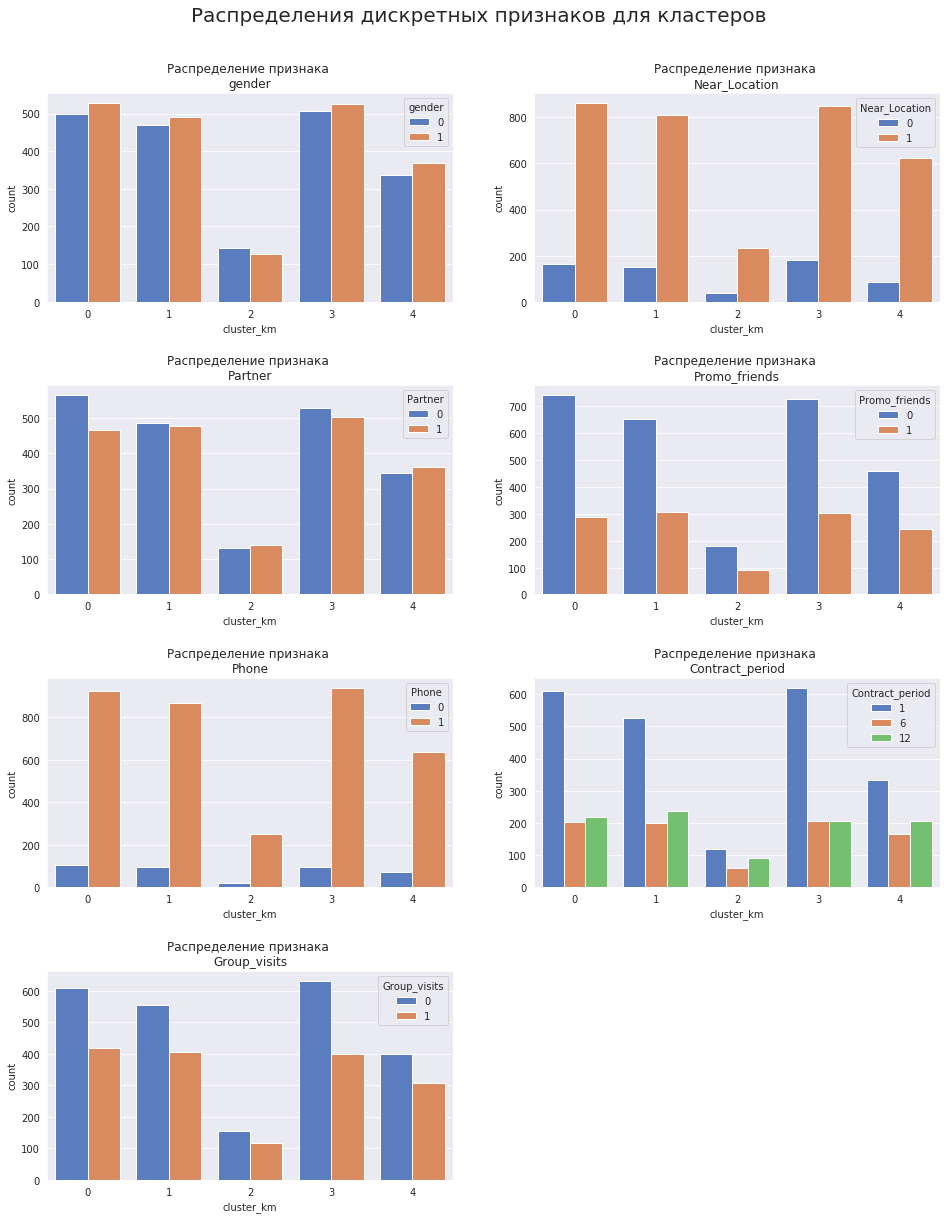

In [16]:
plt.subplots_adjust(wspace=0.2, hspace=0.4)

for i, col in enumerate(disc_features):
    plt.subplot(4, 2, i+1)
    fig = plt.gcf()
    fig.set_size_inches(16, 20)
    sns.countplot(data = df, x = 'cluster_km', hue = col, palette="muted")
    plt.title('Распределение признака \n'+ str(col))

plt.suptitle('Распределения дискретных признаков для кластеров', y = .94, fontsize=20)
plt.show()

**Основные различия распределения внутри кластеров:**
- 2-й кластер выделяется тем, что для его пользователей характерна наименьшая доля абоенементов сроком на 1 месяц по сравнению с остальными кластерами. Напомним, что 2-й кластер также отмечается наименьшим показателем оттока и наибольшими тратами на сопутствующие услуги, что в целом характеризует его, как кластер с максимальным уровнем лояльности.
- Также, для клиентов именно 2-го кластера наиболее популярны групповые занятия по сравнению с другими кластерами.
- В тоже время 2-й кластер самый малочисленный по количеству клиентов.

**Сходства распределения внутри кластеров:**
- Распределение по признаку пола и привлечения с помощью партнерской программы равномерно внутри каждого из кластеров.
- В каждом из кластверов существенно преобладают клиенты живущие/работающие поблизости
- Для всех кластеров характерно примерно в равной степени привлечение клиентов по программе "Приведи друга"
- В целом можно отметить схожесть распределения по остальным признакам во всех кластерах, кроме выше упомянутых.

### Выводы <a id='section_14'></a>
[к плану исследования](#section_0)

На основании стандартизированных данных (без учета целевого признака оттока) была выведена дендрограмма и выделено 5 классов.

Анализ средних значений признаков показал, что наиболее существенные различия между кластерами можно заметить по признаку суммарной выручки от сопутствующих услуг `Avg_additional_charges_total`. Это заметно и на гистограмме распределения этого признака по классам, где видны четкие границы, исходя из сего мы выдвинули предположение, что этот признак вероятнее всего был основополагающим при выделении кластеров.

Средние показатели оттока показали, что наиболее склонными к уходу являются клиенты из 0 и 3 кластеров, в то время как 2-й кластер показвает наиболее высокую лояльность посещения фитнес-центров и трат на сопутствующие услуги.

## Выводы и базовые рекомендации по работе с клиентами <a id='section_15'></a>
[к плану исследования](#section_0)

Анализ показателей оттока в сочетании с другими признаками указывают, что пониженный жизненный цикл и как следствие повышенный показатель оттока в большинстве случаев характерен для клиентов с коротким сроком абонемента.

**Следовательно, логично было бы стимулировать приобретение абонементов абонементов на более длительный срок**

Также можно отметить более редкие посещения клиентами, склонных к оттоку.

**Это также наводит на мысль, что более частые и регулярные посещения втягивают в процесс занятий спортом и вызывают привыкание и способствуют определению режима. Возможно, cтоило бы в качестве бонуса предлагать программы тренировок (индивидульных/групповых), где акцентировалось бы внимание на необходимость 2-3 трениовок в неделю.**

**Помимо прочего следует развивать сегмент B2B / корпоративное сотрудничество. Статистика показывает, что клинеенты привлеченные по корпоративным программам уходят заметно реже.**

**Также логичным будет редкие ненавящивые напоминания о себе и персинифицированные предложения для ушедших или потенциально уходящих клиентов, учитывая тот факт, что 90% указали телефон, который можно использовать как один из комуникационных каналов.**